# Historic wildfire perimeters

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import json
import jenkspy
import altair_latimes as lat
import altair as alt
alt.renderers.enable('notebook')
alt.themes.register('latimes', lat.theme)
alt.themes.enable('latimes')

ThemeRegistry.enable('latimes')

In [2]:
# processed @ wildfires/00_cleaning.ipynb
wildfires = gpd.read_file('/Users/mhustiles/data/data/GIS/wildfires/FRAP/output/wildfires.geojson')

In [3]:
wildfires['alarm_date'] = wildfires['alarm_date'].str.replace('T00:00:00', '')

In [4]:
wildfires.head()

objectid year_ state agency unit_id fire_name   inc_num  alarm_date  \
0        1  2007    CA    CCO     LAC   OCTOBER  00246393  2007-10-21   
1        2  2007    CA    CCO     LAC     MAGIC  00233077  2007-10-22   
2        3  2007    CA    USF     ANF     RANCH  00000166  2007-10-20   
3        4  2007    CA    CCO     LAC      EMMA  00201384  2007-09-11   
4        5  2007    CA    CCO     LAC    CORRAL  00259483  2007-11-24   

    cont_date cause  ... alarm_year alarm_quarter  alarm_day alarm_month  \
0  2007-10-23    14  ...       2007             4         21          10   
1  2007-10-25    14  ...       2007             4         22          10   
2  2007-11-15     2  ...       2007             4         20          10   
3  2007-09-11    14  ...       2007             3         11           9   
4  2007-11-27    14  ...       2007             4         24          11   

  alarm_monthname     cause_description            agency_description  \
0         October  Unknown/Unidentified             Contract Counties   
1         October  Unknown/Unidentified             Contract Counties   
2         October         Equipment Use  United States Forest Service   
3       September  Unknown/Unidentified             Contract Counties   
4        November  Unknown/Unidentified             Contract Counties   

          unit_description     fire  \
0       Los Angeles County  October   
1       Los Angeles County    Magic   
2  Angeles National Forest    Ranch   
3       Los Angeles County     Emma   
4       Los Angeles County   Corral   

                                            geometry  
0  (POLYGON ((-118.4985124819225 34.3824189370447...  
1  (POLYGON ((-118.5844782794717 34.4197766738174...  
2  (POLYGON ((-118.7564468802518 34.5965130520924...  
3  (POLYGON ((-118.0727716195954 34.5019812566583...  
4  (POLYGON ((-118.7440804532698 34.0812976688129...  

[5 rows x 27 columns]

### Add CA counties

In [5]:
counties = gpd.read_file('http://s3-us-west-2.amazonaws.com/boundaries.\
latimes.com/archive/1.0/boundary-set/counties-2012.geojson')

In [6]:
## corresponds to census 'consolidated statistical area' 
la_csa = counties[(counties['name'] == 'Los Angeles') \
                   | (counties['name'] == 'Orange') \
                   | (counties['name'] == 'Ventura') \
                   | (counties['name'] == 'San Bernardino')\
                   | (counties['name'] == 'Riverside')]

In [7]:
## corresponds to census 'consolidated statistical area' 
la_county = counties[(counties['name'] == 'Los Angeles')]

In [8]:
la_area_fires = gpd.sjoin(wildfires, la_csa, op='within')
la_county_fires = gpd.sjoin(wildfires, la_county, op='intersects')

In [9]:
len(la_county_fires)

999

In [10]:
len(la_area_fires)

2147

In [11]:
len(wildfires)

9643

In [12]:
la_area_fires_lg = la_area_fires[la_area_fires['gis_acres'] > 1000 ]
la_county_fires_lg = la_county_fires[la_county_fires['gis_acres'] > 1000 ]

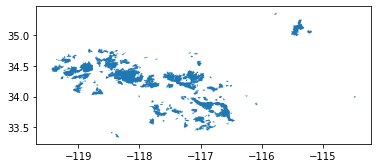

In [13]:
la_area_fires_lg.plot()

In [14]:
la_area_fires_lg.to_file('/Users/mhustiles/data/data/GIS/\
wildfires/FRAP/output/la_county_fires_lg.geojson', driver='GeoJSON')